## Example plots from "replay season" data

Running `airsenal_replay_season` now writes a json file, with data on the squads selected, and expected and actual points.

In [5]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the json file.

In [49]:
current_dir = '/Users/crangelsmith/Downloads/AIrsenal_replays/airsenalhack2/hackresults'
json_filepath = os.path.join(current_dir, "Replay_2223_GW1_GW38_2023-06-13 15:35:43.483267.json")
data = json.load(open(json_filepath))
season = data['season']
weeks_ahead = data['weeks_ahead']

In [50]:
data["gameweeks"][0].keys()

dict_keys(['gameweek', 'predictions_tag', 'starting_11', 'subs', 'vice_captain', 'captain', 'free_transfers', 'num_transfers', 'points_hit', 'players_in', 'players_out', 'expected_points', 'actual_points'])

### Predicted and actual points scored

Now lets make plots of week-by-week, and cumulative, expected and actual points for the squad:

In [72]:
def get_season_performance(data):

    xvals = list(range(1,len(data["gameweeks"])+1))
    expvals = []
    actualvals = []
    exp_actual_diff_change = []
    exp_actual_diff = []

    for gw in data["gameweeks"]:
        expvals.append(gw["expected_points"])
        actualvals.append(gw["actual_points"])
        if gw["actual_points"] != 0:
            exp_actual_diff_change.append((gw["expected_points"]-gw["actual_points"])/(gw["actual_points"])*100)
        else:
            exp_actual_diff_change.append(0)
    
        exp_actual_diff.append(gw["expected_points"]-gw["actual_points"])

        

    fig, axes = plt.subplots(2,1,figsize=(16,9))    
    axes[0].plot(xvals,expvals)
    axes[0].plot(xvals,actualvals)
    axes[1].plot(xvals,np.cumsum(expvals), label="expected")
    axes[1].plot(xvals,np.cumsum(actualvals), label="actual")
    #axes[2].plot(xvals,exp_actual_diff_change, label = 'relative change')
    #axes[3].plot(xvals,np.cumsum(exp_actual_diff), label="cumulative difference")
    axes[1].legend()

    
    return ({'season':data['season'],'weeks_ahead':data['weeks_ahead'],'n_weeks':xvals,'expected_vals':expvals,'actual_vals':actualvals,'relative_difference_exp_actual':exp_actual_diff_change,'cum_sum_relative_difference_exp_actual':np.cumsum(exp_actual_diff)})
                
                

Looks like our expected points were wildly optimistic, especially for some weeks at the end - perhaps this is an example of big players being rested, perhaps for Champions League games, or just being unlikely to play both games in a Double Gameweek, which we currently don't take into account.

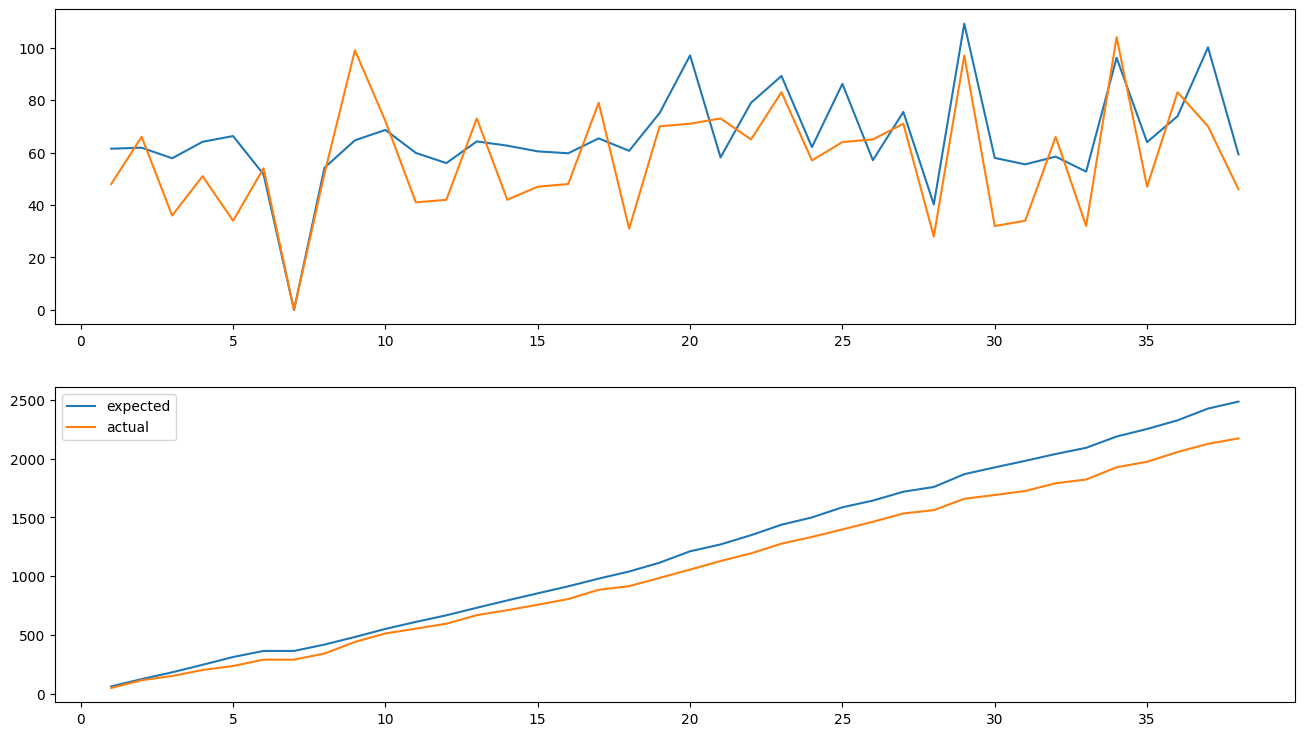

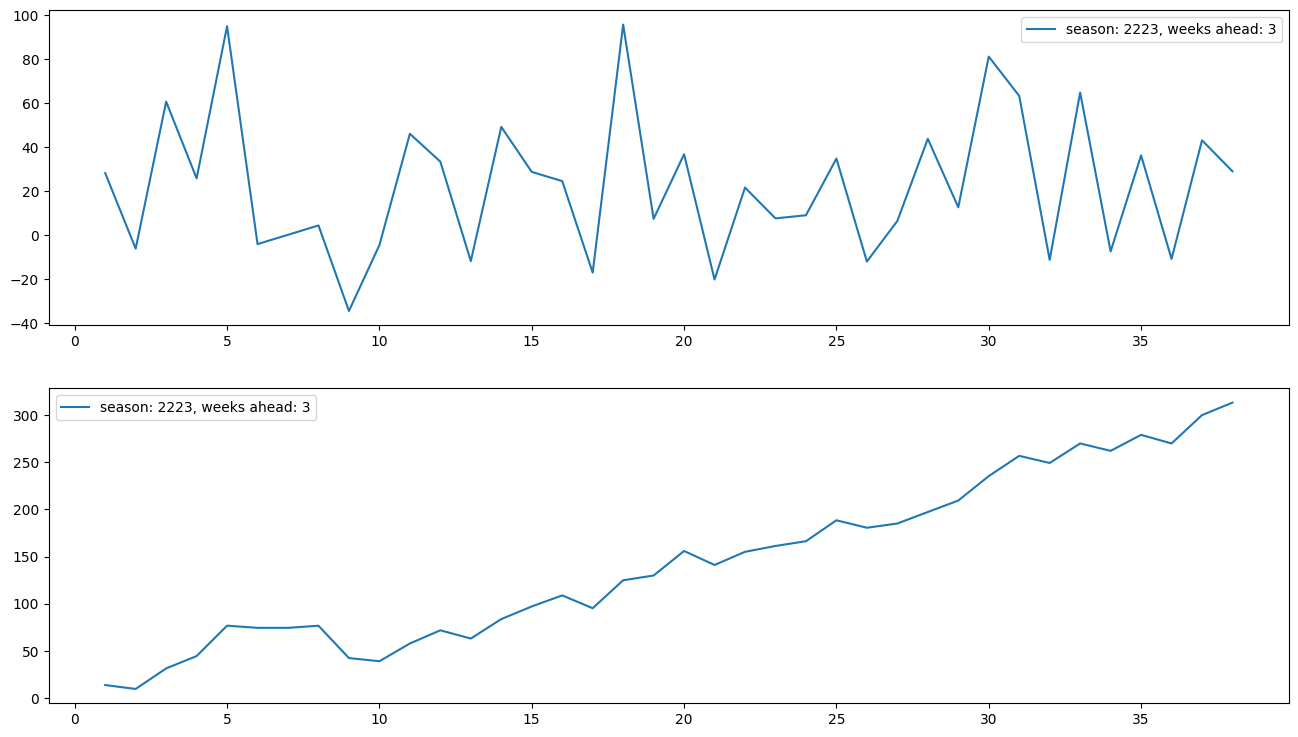

In [83]:
results = get_season_performance(data)
fig, axes = plt.subplots(2,1,figsize=(16,9))    
axes[0].plot(results['n_weeks'],results['relative_difference_exp_actual'], label = f"season: {data['season']}, weeks ahead: {data['weeks_ahead']}")
axes[1].plot(results['n_weeks'],results['cum_sum_relative_difference_exp_actual'], label = f"season: {data['season']}, weeks ahead: {data['weeks_ahead']}")
axes[0].legend()
axes[1].legend()
